In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


Y

In [2]:
path_to_dir_packages = "./packages"
!mkdir -p {path_to_dir_packages}

In [3]:
!pip download pycaret -d {path_to_dir_packages}
!pip download poetry-core -d {path_to_dir_packages}
!pip download oldest-supported-numpy -d {path_to_dir_packages}

  Obtaining dependency information for pycaret from https://files.pythonhosted.org/packages/d5/54/d575af389203fc27d6c6cf7d60c4e67fcabfda4bc8e84271c8a396bd4a03/pycaret-3.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for ipython>=5.5.0 from https://files.pythonhosted.org/packages/20/45/18f0dc2cbc3ee6680a004f620fb1400c6511ded0a76a2dd241813786ce73/ipython-8.17.2-py3-none-any.whl.metadata
  Obtaining dependency information for ipywidgets>=7.6.5 from https://files.pythonhosted.org/packages/4a/0e/57ed498fafbc60419a9332d872e929879ceba2d73cb11d284d7112472b3e/ipywidgets-8.1.1-py3-none-any.whl.metadata
  Obtaining dependency information for tqdm>=4.62.0 from https://files.pythonhosted.org/packages/00/e5/f12a80907d0884e6dff9c16d0c0114d81b8cd07dc3ae54c5e962cc83037e/tqdm-4.66.1-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 70.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [4]:
!pip install --no-index --find-links=packages pycaret

Looking in links: packages
Processing ./packages/pycaret-3.1.0-py3-none-any.whl
Processing ./packages/numpy-1.23.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (from pycaret)
Processing ./packages/pandas-1.5.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (from pycaret)
Processing ./packages/scipy-1.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (from pycaret)
Processing ./packages/pyod-1.1.1.tar.gz (from pycaret)
  Preparing metadata (setup.py) ... - \ | / done
Processing ./packages/kaleido-0.2.1-py2.py3-none-manylinux1_x86_64.whl (from pycaret)
Processing ./packages/schemdraw-0.15-py3-none-any.whl (from pycaret)
Processing ./packages/plotly_resampler-0.9.1-py3-none-any.whl (from pycaret)
Processing ./packages/sktime-0.21.1-py3-none-any.whl (from pycaret)
Processing ./packages/tbats-1.1.3-py3-none-any.whl (from pycaret)
Processing ./packages/pmdarima-2.0.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.w

In [5]:
import numpy as np 
import pandas as pd 
import scipy.stats

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew, kurtosis

from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import StandardScaler
from pycaret.regression import setup, compare_models



from catboost import CatBoostRegressor
from sklearn.linear_model import BayesianRidge, HuberRegressor, Ridge, OrthogonalMatchingPursuit
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor



import warnings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set_style('darkgrid')
warnings.filterwarnings("ignore")

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## Load and combine Data_sets

In [6]:
# load datasets
train_df=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test_df=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

# split the Target column
target=train_df.SalePrice

#combine train and test sets for preprocessing
df=pd.concat([train_df.drop('SalePrice',axis=1),test_df])
print('combined')

combined


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
# train=df.iloc[:1460, :]
# test=df.iloc[-1459:, :]

In [9]:
print(train_df.info())
print('='*48)
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**so we have 80 cols and 1 label column**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

## Data cleaning

In [11]:
#drop high cardinality features
df.drop('Id',axis=1,inplace=True)

### Make sure that all columns have the proper data type <br>
***if we took a closer look at MSSubclass featur we notice that it is encoded as ordinal feature 
but the real values are not represent order so we will convert it to str 'object'***<br>
MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

In [12]:
# convert MSSubclass data type to str 'O' as 'Object'
df.MSSubClass=df.MSSubClass.astype('str')
# check 
print(df.MSSubClass.dtype)

object


## Fill Categorical Missing Values


**for some categorical features NA Really means some thing so for all features like that we will replace NA with None**<br>
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
       <br>
       

In [13]:
# Nulls for Cat Features Before
df.select_dtypes('O').isnull().sum().sort_values(ascending=False)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
FireplaceQu      1420
GarageFinish      159
GarageCond        159
GarageQual        159
GarageType        157
BsmtExposure       82
BsmtCond           82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MSZoning            4
Functional          2
Utilities           2
KitchenQual         1
Exterior1st         1
Exterior2nd         1
Electrical          1
SaleType            1
PavedDrive          0
Heating             0
CentralAir          0
HeatingQC           0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
RoofMatl            0
RoofStyle           0
HouseStyle          0
BldgType            0
Condition2          0
Condition1          0
Neighborhood        0
LandSlope           0
LotConfig           0
LandContour         0
LotShape            0
Street              0
SaleCondition       0
dtype: int64

In [14]:
#filling the features which Na has meaning in it 
cat_f_1=['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType'
   ,'GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']
for column in cat_f_1:
    df[column] = df[column].fillna("None")

In [15]:
# Nulls for Cat Features After phase 1
df.select_dtypes('O').isnull().sum().sort_values(ascending=False)

MasVnrType       24
MSZoning          4
Functional        2
Utilities         2
SaleType          1
Exterior2nd       1
Exterior1st       1
Electrical        1
KitchenQual       1
MSSubClass        0
Heating           0
HeatingQC         0
CentralAir        0
FireplaceQu       0
BsmtFinType1      0
GarageType        0
GarageFinish      0
GarageQual        0
GarageCond        0
PavedDrive        0
PoolQC            0
Fence             0
MiscFeature       0
BsmtFinType2      0
BsmtQual          0
BsmtExposure      0
Condition1        0
Street            0
Alley             0
LotShape          0
LandContour       0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition2        0
BsmtCond          0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
ExterQual         0
ExterCond         0
Foundation        0
SaleCondition     0
dtype: int64

In [16]:
#filling the other cat features with the most frequent value
cat_f_2=['MasVnrType','MSZoning','Functional','Utilities','SaleType','Exterior2nd','Exterior1st',
         'Electrical' ,'KitchenQual']
for column in cat_f_2:
    df[column] = df[column].fillna(df[column].mode()[0])

In [17]:
# Nulls for Cat Features After phase 2
df.select_dtypes('O').isnull().sum().sort_values(ascending=False).sum()

0

## Handling numerical Missing Value

In [18]:
"""
now for the numerical Missing Value imputation we will use KNN Imputer 
 simply we will use KNN model and train it on the data which not having nulls 
and then use the trained model to predict the na values based on the nearest k neighbors
""";
def _KNN_(data,col):
    

    
    numerical_data=data.select_dtypes(exclude='O')
    clean_numerical_cols=numerical_data.isna().sum()[numerical_data.isna().sum()==0].index
    
    X_train= numerical_data[clean_numerical_cols][numerical_data[col].isna()==0]
    y_train= numerical_data[col][numerical_data[col].isna()==0]
    
    X_test=numerical_data[clean_numerical_cols][numerical_data[col].isna()==1]
    
    KNN=KNeighborsRegressor(n_neighbors=5)
    KNN.fit(X_train,y_train)
    
    y_pred=KNN.predict(X_test)
    
    data[col][data[col].isna()==1]=y_pred
    
    
    return data
    
    
    
    

In [19]:
num_f=['LotFrontage','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath',
    'BsmtHalfBath','GarageYrBlt','GarageCars','GarageArea']
for col in num_f:
    clean_df=_KNN_(df,col)
    


Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7ed81a8f9bd0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 847, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 984, in _make_controller_from_path
    lib_controller = controller_class(filepath=filepath, prefix=prefix)
  File "/opt/conda/lib/python3.10/site-packages/threadpoolctl.py", line 111, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/opt/conda/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: /opt/conda/lib/python3.10/site-packages/numpy.libs/libopenblas64_p-r0-15028c96.3.21.so: cannot open shared object file: No such file or directory


In [20]:
clean_df.isna().sum().sum()

0

In [21]:
len(clean_df.columns)

79

### Feature Engineering

In [22]:
#LotFrontage: Linear feet of street connected to property
#LotArea: Lot size in square feet

# we can combine the both features to get the total area of both 
clean_df['TotalArea']=clean_df['LotFrontage']+clean_df['LotArea']

In [23]:
#OverallQual: Rates the overall material and finish of the house
#OverallCond: Rates the overall condition of the house

clean_df['Total_Home_Quality'] = clean_df['OverallQual'] + clean_df['OverallCond']

In [24]:
'''BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade'''

clean_df['Total_Bathrooms'] = (clean_df['FullBath'] + (0.5 * clean_df['HalfBath']) +
                               clean_df['BsmtFullBath'] + (0.5 * clean_df['BsmtHalfBath']))

In [25]:
clean_df["AllSF"] = clean_df["GrLivArea"] + clean_df["TotalBsmtSF"]

clean_df["AvgSqFtPerRoom"] = clean_df["GrLivArea"] / (clean_df["TotRmsAbvGrd"] +
                                                       clean_df["FullBath"] +
                                                       clean_df["HalfBath"] +
                                                       clean_df["KitchenAbvGr"])

clean_df["totalFlrSF"] = clean_df["1stFlrSF"] + clean_df["2ndFlrSF"]



In [26]:

def Gar_category(cat):
    if cat <= 250:
        return 1
    elif cat <= 500 and cat > 250:
        return 2
    elif cat <= 1000 and cat > 500:
        return 3
    return 4
clean_df['GarageArea_cat'] = clean_df['GarageArea'].apply(Gar_category).astype('str')

def Low_category(cat):
    if cat <= 1000:
        return 1
    elif cat <= 2000 and cat > 1000:
        return 2
    elif cat <= 3000 and cat > 2000:
        return 3
    return 4
clean_df['GrLivArea_cat'] = clean_df['GrLivArea'].apply(Low_category).astype('str')

def fl1_category(cat):
    if cat <= 500:
        return 1
    elif cat <= 1000 and cat > 500:
        return 2
    elif cat <= 1500 and cat > 1000:
        return 3
    elif cat <= 2000 and cat > 1500:
        return 4
    return 5
clean_df['1stFlrSF_cat'] = clean_df['1stFlrSF'].apply(fl1_category).astype('str')
clean_df['2ndFlrSF_cat'] = clean_df['2ndFlrSF'].apply(fl1_category).astype('str')

def bsmtt_category(cat):
    if cat <= 500:
        return 1
    elif cat <= 1000 and cat > 500:
        return 2
    elif cat <= 1500 and cat > 1000:
        return 3
    elif cat <= 2000 and cat > 1500:
        return 4
    return 5
clean_df['TotalBsmtSF_cat'] = clean_df['TotalBsmtSF'].apply(bsmtt_category).astype('str')

def bsmt_category(cat):
    if cat <= 500:
        return 1
    elif cat <= 1000 and cat > 500:
        return 2
    elif cat <= 1500 and cat > 1000:
        return 3
    elif cat <= 2000 and cat > 1500:
        return 4
    return 5
clean_df['BsmtUnfSF_cat'] = clean_df['BsmtUnfSF'].apply(bsmt_category).astype('str')

def lot_category(cat):
    if cat <= 50:
        return 1
    elif cat <= 100 and cat > 50:
        return 2
    elif cat <= 150 and cat > 100:
        return 3
    return 4
clean_df['LotFrontage_cat'] = clean_df['LotFrontage'].apply(lot_category).astype('str')

def lot_category1(cat):
    if cat <= 5000:
        return 1
    elif cat <= 10000 and cat > 5000:
        return 2
    elif cat <= 15000 and cat > 10000:
        return 3
    elif cat <= 20000 and cat > 15000:
        return 4
    elif cat <= 25000 and cat > 20000:
        return 5
    return 6
clean_df['LotArea_cat'] = clean_df['LotArea'].apply(lot_category1).astype('str')

def year_category(yb):
    if yb <= 1910:
        return 1
    elif yb <= 1950 and yb > 1910:
        return 2
    elif yb >= 1950 and yb < 1980:
        return 3
    elif yb >= 1980 and yb < 2000:
        return 4
    return 5



clean_df['YearBuilt_cat'] = clean_df['YearBuilt'].apply(year_category).astype('str').astype('str').astype('str')
clean_df['YearRemodAdd_cat'] = clean_df['YearRemodAdd'].apply(year_category).astype('str').astype('str')
clean_df['GarageYrBlt_cat'] = clean_df['GarageYrBlt'].apply(year_category).astype('str')

def vnr_category(cat):
    if cat <= 250:
        return 1
    elif cat <= 500 and cat > 250:
        return 2
    elif cat <= 750 and cat > 500:
        return 3
    return 4

clean_df['MasVnrArea_cat'] = clean_df['MasVnrArea'].apply(vnr_category).astype('str')

def allsf_category(yb):
    if yb <= 1000:
        return 1
    elif yb <= 2000 and yb > 1000:
        return 2
    elif yb >= 3000 and yb < 2000:
        return 3
    elif yb >= 4000 and yb < 3000:
        return 4
    elif yb >= 5000 and yb < 4000:
        return 5
    elif yb >= 6000 and yb < 5000:
        return 6
    return 7

clean_df['AllSF_cat'] = clean_df['AllSF'].apply(allsf_category).astype('str')

In [27]:
df1=clean_df.copy()

## Feature Transformation

In [28]:
# Create a DataFrame with skewness information
skew_df = pd.DataFrame(df1.select_dtypes(np.number).columns, columns=['Feature'])
skew_df['Skewness'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(df1[feature]))
skew_df['kurtosis'] = skew_df['Feature'].apply(lambda feature: scipy.stats.kurtosis(df1[feature]))
skew_df['Absolute Skew'] = skew_df['Skewness'].apply(abs)
skew_df['Skewed'] = skew_df['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)


skew_df

,Feature,Skewness,kurtosis,Absolute Skew,Skewed
0,LotFrontage,1.340751,10.481812,1.340751,True
1,LotArea,12.822431,264.496632,12.822431,True
2,OverallQual,0.197110,0.065049,0.197110,False
3,OverallCond,0.570312,1.474860,0.570312,True
4,YearBuilt,-0.599806,-0.512497,0.599806,True
5,YearRemodAdd,-0.451020,-1.346181,0.451020,False
6,MasVnrArea,2.603682,9.262726,2.603682,True
7,BsmtFinSF1,1.425516,6.893227,1.425516,True
8,BsmtFinSF2,4.146111,18.810095,4.146111,True
9,BsmtUnfSF,0.919322,0.401755,0.919322,True


In [29]:
skewed_features=skew_df['Feature'][skew_df.Skewed==True].values

for column in skewed_features:
    df1[column] = np.log1p(df1[column])

In [30]:
df1['MoSold'] = (-np.cos(0.5236 * df1['MoSold']))

In [31]:
df2=pd.get_dummies(df1)

In [32]:
df2.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalArea,Total_Home_Quality,Total_Bathrooms,AllSF,AvgSqFtPerRoom,totalFlrSF,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Func

In [33]:
scaler = StandardScaler()
scaler.fit(df2)

scaled_df = pd.DataFrame(scaler.transform(df2), index=df2.index, columns=df2.columns)

In [34]:
scaled_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalArea,Total_Home_Quality,Total_Bathrooms,AllSF,AvgSqFtPerRoom,totalFlrSF,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Func

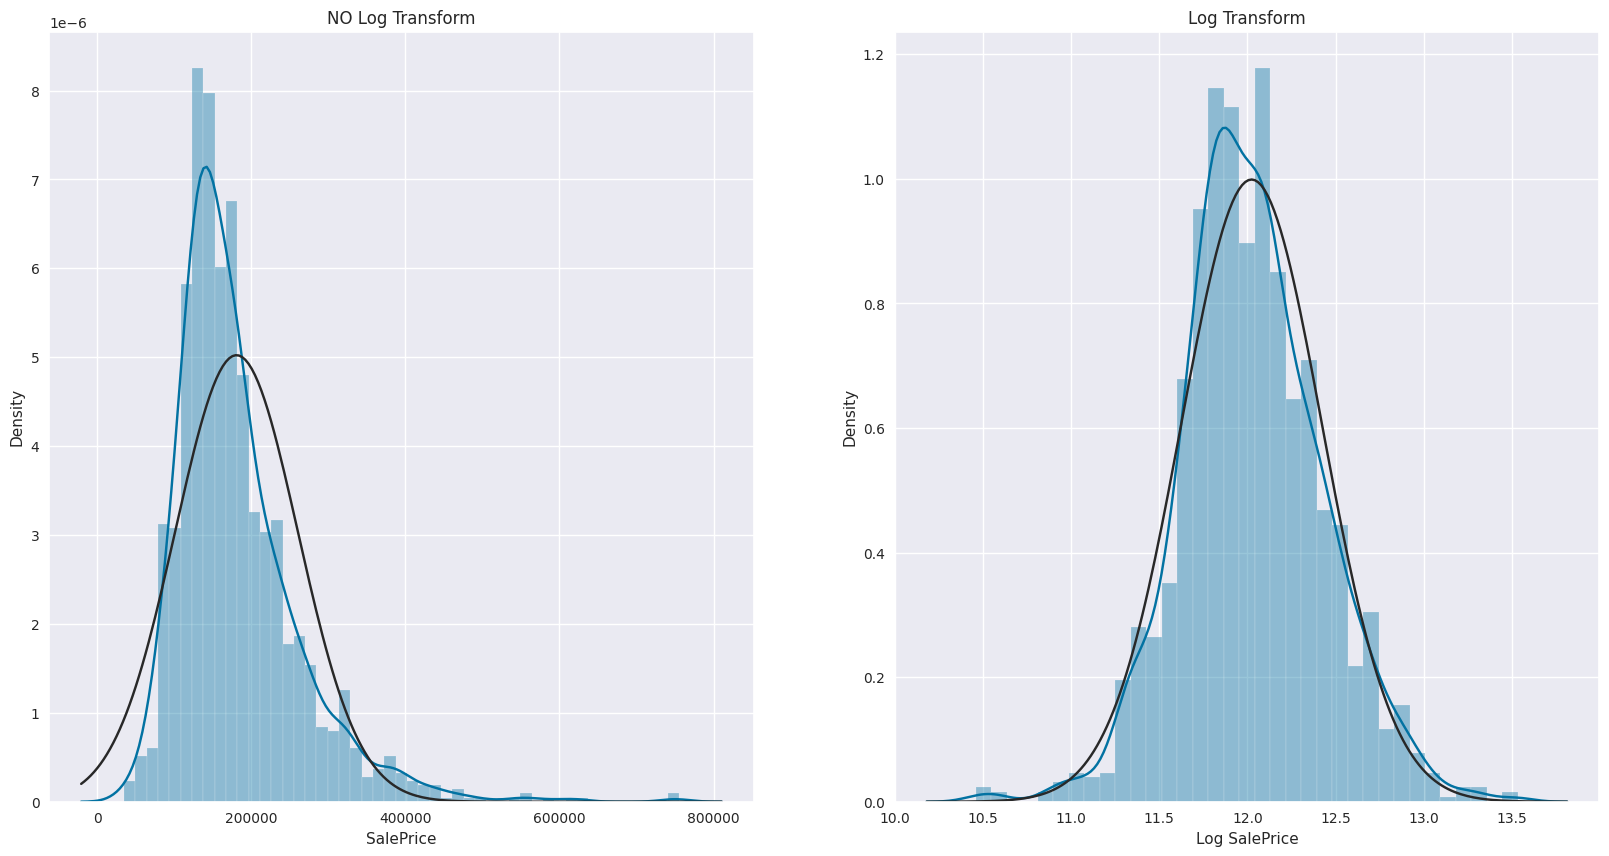

In [35]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.distplot(target, kde=True, fit=scipy.stats.norm)
plt.title("NO Log Transform")

plt.subplot(1, 2, 2)
sns.distplot(np.log(target), kde=True, fit=scipy.stats.norm)
plt.xlabel("Log SalePrice")
plt.title("Log Transform")

plt.show()

In [36]:
log_target = np.log(target)

In [37]:
train_df.index.max()

1459

In [38]:
len(test_df)

1459

In [39]:
scaled_df.iloc[-1459:, :].head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalArea,Total_Home_Quality,Total_Bathrooms,AllSF,AvgSqFtPerRoom,totalFlrSF,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Func

In [40]:
X_train=scaled_df.iloc[:1460, :]
X_test=scaled_df.iloc[-1459:, :]

In [41]:
_ = setup(data=pd.concat([X_train, log_target], axis=1), target='SalePrice')

,Description,Value
0,Session id,5394
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1460, 383)"
4,Transformed data shape,"(1460, 383)"
5,Transformed train set shape,"(1021, 383)"
6,Transformed test set shape,"(439, 383)"
7,Numeric features,382
8,Preprocess,True
9,Imputation type,simple


In [42]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.0789,0.0146,0.1183,0.9118,0.0091,0.0066,5.7190
gbr,Gradient Boosting Regressor,0.0880,0.0167,0.1275,0.8981,0.0099,0.0074,0.4070
br,Bayesian Ridge,0.0850,0.0172,0.1293,0.8941,0.0100,0.0071,0.0580
lightgbm,Light Gradient Boosting Machine,0.0899,0.0177,0.1311,0.8925,0.0101,0.0075,0.4030
omp,Orthogonal Matching Pursuit,0.0902,0.0192,0.1365,0.8800,0.0106,0.0075,0.0400
rf,Random Forest Regressor,0.0965,0.0201,0.1399,0.8782,0.0108,0.0081,1.1080
xgboost,Extreme Gradient Boosting,0.0989,0.0216,0.1446,0.8703,0.0112,0.0083,0.4180
ridge,Ridge Regression,0.0959,0.0221,0.1462,0.8629,0.0113,0.0080,0.0420
et,Extra Trees Regressor,0.1000,0.0229,0.1493,0.8616,0.0116,0.0084,1.0620
ada,AdaBoost Regressor,0.1257,0.0279,0.1662,0.8285,0.0129,0.0105,0.2430


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [43]:
cat_boost=CatBoostRegressor()
cat_boost.fit(X_train,log_target);

Learning rate set to 0.043466
0:	learn: 0.3875411	total: 5.53ms	remaining: 5.52s
1:	learn: 0.3774806	total: 10.5ms	remaining: 5.25s
2:	learn: 0.3673943	total: 15.3ms	remaining: 5.09s
3:	learn: 0.3575291	total: 19.8ms	remaining: 4.94s
4:	learn: 0.3477264	total: 24.3ms	remaining: 4.83s
5:	learn: 0.3384010	total: 28.9ms	remaining: 4.78s
6:	learn: 0.3289508	total: 33.5ms	remaining: 4.75s
7:	learn: 0.3202687	total: 38.1ms	remaining: 4.72s
8:	learn: 0.3125727	total: 42.6ms	remaining: 4.69s
9:	learn: 0.3041039	total: 47ms	remaining: 4.65s
10:	learn: 0.2969620	total: 51.4ms	remaining: 4.63s
11:	learn: 0.2896930	total: 56.1ms	remaining: 4.61s
12:	learn: 0.2826317	total: 60.5ms	remaining: 4.59s
13:	learn: 0.2759130	total: 64.8ms	remaining: 4.57s
14:	learn: 0.2690624	total: 69.5ms	remaining: 4.56s
15:	learn: 0.2627980	total: 74.3ms	remaining: 4.57s
16:	learn: 0.2573959	total: 78.8ms	remaining: 4.55s
17:	learn: 0.2514063	total: 83.1ms	remaining: 4.53s
18:	learn: 0.2455725	total: 87.5ms	remaining: 

In [44]:
cat_boost_prediction=np.exp(cat_boost.predict(X_test))
cat_boost_prediction

array([128599.67954488, 160142.56668262, 180054.71905104, ...,
       151065.37835879, 115292.66390968, 220436.03303323])

In [45]:
cat_boost_submission = pd.concat([test_df['Id'], pd.Series(cat_boost_prediction, name='SalePrice')], axis=1)
cat_boost_submission.head()

,Id,SalePrice
0,1461,128599.679545
1,1462,160142.566683
2,1463,180054.719051
3,1464,184713.867987
4,1465,185238.640830


In [46]:
cat_boost_submission.to_csv('cat_boost_submission.csv', index=False, header=True)
#0.1246
#0.12889

## Ensemble

In [47]:
models = {
    "catboost": CatBoostRegressor( verbose=0),
    "br": BayesianRidge(),
    "lightgbm": LGBMRegressor(),
    "ridge": Ridge(),
    "omp": OrthogonalMatchingPursuit(),
    'GBR':GradientBoostingRegressor()
}

In [48]:
for name, model in models.items():
    model.fit(X_train, log_target)
    print(name + " trained.")

catboost trained.
br trained.
lightgbm trained.
ridge trained.
omp trained.
GBR trained.


In [49]:
predictions = (
    0.4 * np.exp(models['catboost'].predict(X_test)) +
    0.2 * np.exp(models['omp'].predict(X_test)) +
    0.1 * np.exp(models['br'].predict(X_test)) +
    0.1 * np.exp(models['GBR'].predict(X_test)) +
    0.1 * np.exp(models['lightgbm'].predict(X_test))+
    0.1 * np.exp(models['ridge'].predict(X_test))
)

In [50]:
submission = pd.concat([test_df['Id'], pd.Series(predictions, name='SalePrice')], axis=1)
submission

,Id,SalePrice
0,1461,124715.257919
1,1462,161721.865720
2,1463,181322.989539
3,1464,191988.141656
4,1465,189761.983049
...,...,...
1454,2915,85445.775983
1455,2916,83240.629634
1456,2917,158983.181097
1457,2918,116488.768492


In [51]:
submission.to_csv('./ensemble_submission3.csv', index=False, header=True)

In [52]:
catboost_params = {
    'iterations': 6000,
    'learning_rate': 0.005,
    'depth': 4,
    'l2_leaf_reg': 1,
    'eval_metric':'RMSE',
    'early_stopping_rounds': 200,
    'random_seed': 42
}

br_params = {
    'n_iter': 304,
    'tol': 0.16864712769300896,
    'alpha_1': 5.589616542154059e-07,
    'alpha_2': 9.799343618469923,
    'lambda_1': 1.7735725582463822,
    'lambda_2': 3.616928181181732e-06
}

lightgbm_params = {
    'num_leaves': 39,
    'max_depth': 2,
    'learning_rate': 0.13705339989856127,
    'n_estimators': 273
}

ridge_params = {
    'alpha': 631.1412445239156
}

In [53]:
predictions = (
    0.4 * np.exp(models['catboost'].predict(X_test)) +
    0.1 * np.exp(models['br'].predict(X_test)) +
    0.1 * np.exp(models['lightgbm'].predict(X_test)) +
    0.1 * np.exp(models['ridge'].predict(X_test)) +
    0.2 * np.exp(models['omp'].predict(X_test)) +
    0.1 * np.exp(models['GBR'].predict(X_test))
)

In [54]:
submission = pd.concat([test_df['Id'], pd.Series(predictions, name='SalePrice')], axis=1)
submission

,Id,SalePrice
0,1461,124715.257919
1,1462,161721.865720
2,1463,181322.989539
3,1464,191988.141656
4,1465,189761.983049
...,...,...
1454,2915,85445.775983
1455,2916,83240.629634
1456,2917,158983.181097
1457,2918,116488.768492


In [55]:
submission.to_csv('./ensemble_submission2_with hyperparameter.csv', index=False, header=True)
#Score: 0.12200